# MGSC 661 - Multivariate Stat. Analysis
### Group 9: Assignment #2
Siliu Chen, 
Lucas Doan,
Mackenzie Rock

In [124]:
#Import our libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import BayesianRidge

titanic = pd.read_csv('titanic.csv')
titanic_df = pd.DataFrame(titanic)
titanic_df_exploratory = pd.DataFrame(titanic)

titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [125]:
titanic_df.describe(include='all')


PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [126]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [128]:
print(len(titanic_df))

891


In [129]:
titanic_df = titanic_df.drop(columns = ['Cabin'])
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [130]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [131]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [132]:
titanic_df['Pclass'].value_counts()

titanic_df['1_class'] = np.where(titanic_df['Pclass'] == 1, 1, 0)
titanic_df['2_class'] = np.where(titanic_df['Pclass'] == 2, 1, 0)
titanic_df['3_class'] = np.where(titanic_df['Pclass'] == 3, 1, 0)
titanic_df['male'] = np.where(titanic_df['Sex'] == 'male', 1, 0)
titanic_df['female'] = np.where(titanic_df['Sex'] == 'female', 1, 0)
titanic_df['cherbourg'] = np.where(titanic_df['Embarked'] == 'C', 1, 0)
titanic_df['queenstown'] = np.where(titanic_df['Embarked'] == 'Q', 1, 0)
titanic_df['southampton'] = np.where(titanic_df['Embarked'] == 'S', 1, 0)
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df = titanic_df.drop(columns = ['Pclass', 'PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked', 'SibSp', 'Parch'])
display(titanic_df)


Survived   Age     Fare  1_class  2_class  3_class  male  female  \
0           0  22.0   7.2500        0        0        1     1       0   
1           1  38.0  71.2833        1        0        0     0       1   
2           1  26.0   7.9250        0        0        1     0       1   
3           1  35.0  53.1000        1        0        0     0       1   
4           0  35.0   8.0500        0        0        1     1       0   
..        ...   ...      ...      ...      ...      ...   ...     ...   
886         0  27.0  13.0000        0        1        0     1       0   
887         1  19.0  30.0000        1        0        0     0       1   
888         0   NaN  23.4500        0        0        1     0       1   
889         1  26.0  30.0000        1        0        0     1       0   
890         0  32.0   7.7500        0        0        1     1       0   

     cherbourg  queenstown  southampton  family_size  
0            0           0            1            1  
1            1           0            0            1  
2            0           0            1            0  
3            0           0            1            1  
4            0           0            1            0  
..         ...         ...          ...          ...  
886          0           0            1            0  
887          0           0            1            0  
888          0           0            1            3  
889          1           0            0            0  
890          0           1            0            0  

[891 rows x 12 columns]

In [133]:
titanic_df['Survived'].value_counts()

impute_it = IterativeImputer(estimator = BayesianRidge(), random_state = 42, max_iter = 1000)
something = impute_it.fit_transform(titanic_df)
something = pd.DataFrame(something)
titanic_df.drop(columns = ['Age'])
titanic_df['Age'] = something[1]

X = titanic_df.drop(columns = ['Survived'])
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)


In [134]:
y_train.value_counts(normalize=True)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [135]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

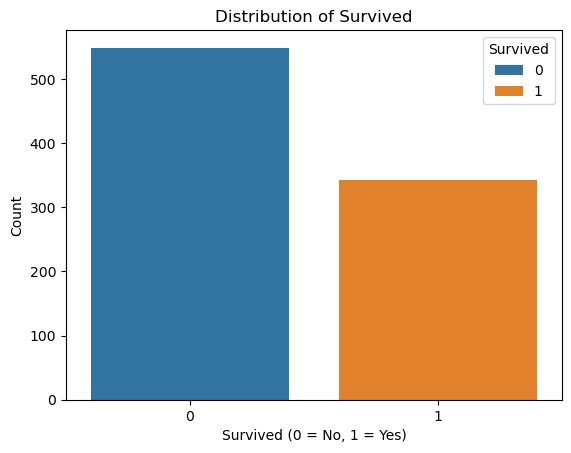

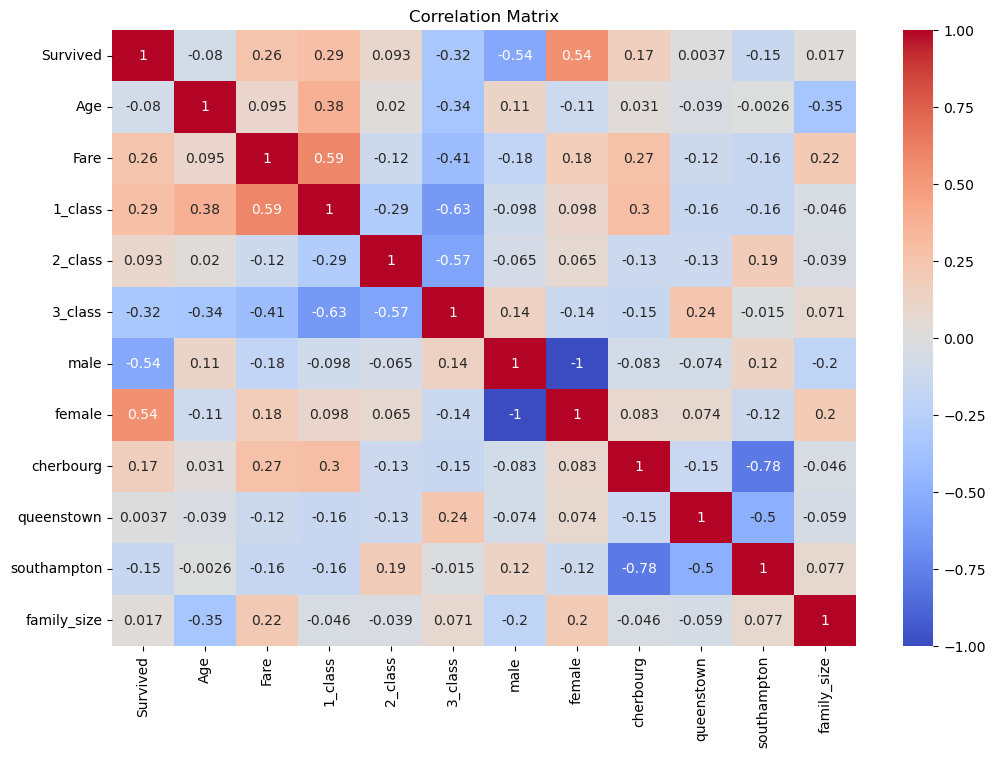

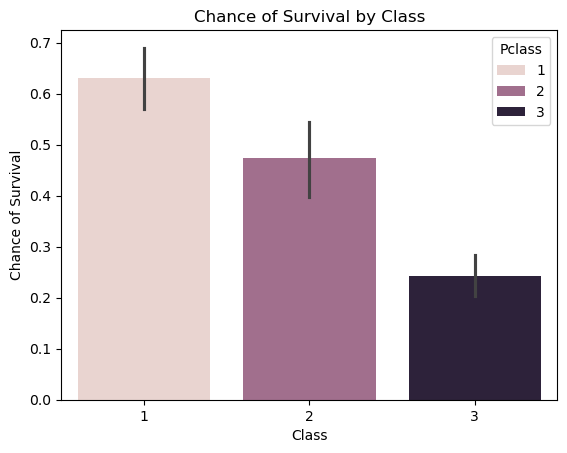

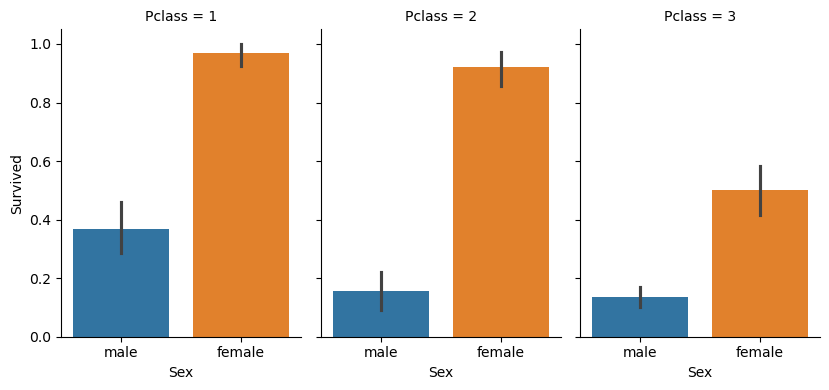

/tmp/ipykernel_27/4014729883.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_df = titanic_df_exploratory.groupby(['Age']).mean().reset_index()


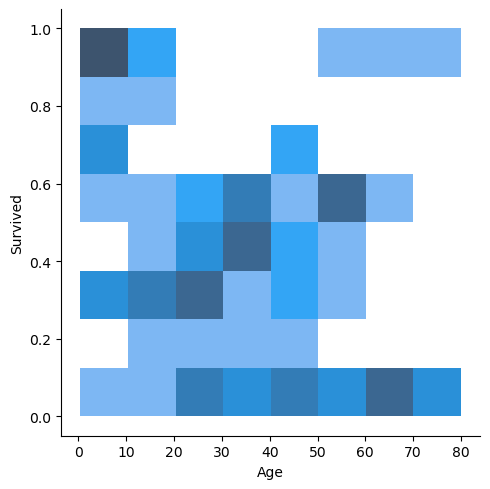

In [137]:
#Prep exploratory DataFrame for visualizations
titanic_df_exploratory = titanic_df_exploratory.drop(columns = ['Cabin'])
titanic_df_exploratory['Age'] = titanic_df_exploratory['Age'].fillna(titanic_df['Age'].mean())
titanic_df_exploratory['Embarked'] = titanic_df_exploratory['Embarked'].fillna('S')

#count plot of survivors on board
sns.countplot(x='Survived', data=titanic_df, hue = 'Survived')
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#correlation matrix
corr_matrix = titanic_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#barplot for class Survival
sns.barplot(titanic_df_exploratory, x=titanic_df_exploratory['Pclass'], y=titanic_df_exploratory['Survived'], estimator = 'mean', hue = 'Pclass')
plt.xlabel('Class')
plt.ylabel('Chance of Survival')
plt.title('Chance of Survival by Class')
plt.show()

#Gender breakdown of classes
sns.catplot(titanic_df_exploratory, x=titanic_df_exploratory['Sex'], y=titanic_df_exploratory['Survived'], col=titanic_df_exploratory['Pclass'], 
kind='bar', height=4, aspect=.7, hue = 'Sex', estimator = 'mean')
plt.show()


#Average survival by Age
average_df = titanic_df_exploratory.groupby(['Age']).mean().reset_index()
sns.displot(average_df, x=average_df['Age'], y=average_df['Survived'])
plt.show()





#sns.pairplot(titanic_df, hue = 'Survived')
#plt.show()



Part 2

Accuracy: 0.83
Precision: 0.82
Recall: 0.72
ROC-AUC: 0.89


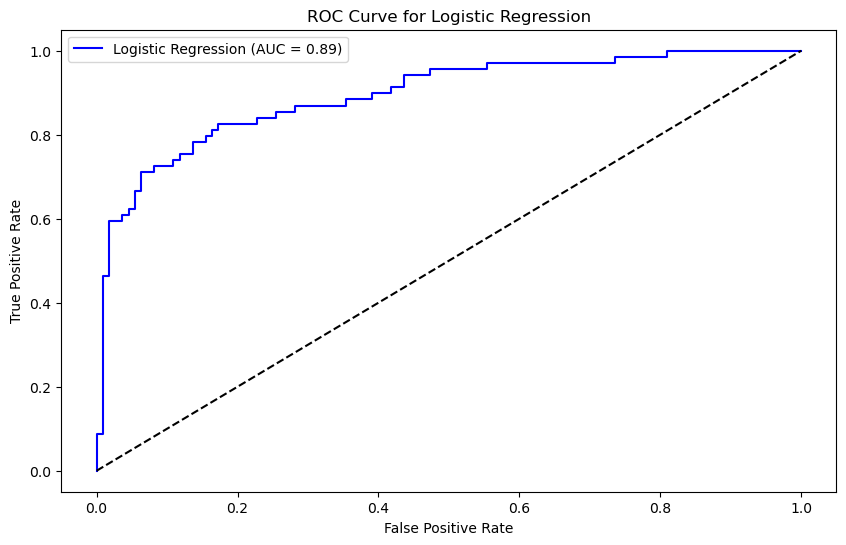

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

        Feature  Coefficient
6        female     1.292363
2       1_class     1.056033
8    queenstown     0.169349
3       2_class     0.088651
7     cherbourg     0.026612
1          Fare     0.002931
0           Age    -0.048310
9   southampton    -0.192018
10  family_size    -0.238860
4       3_class    -1.140741
5          male    -1.288420


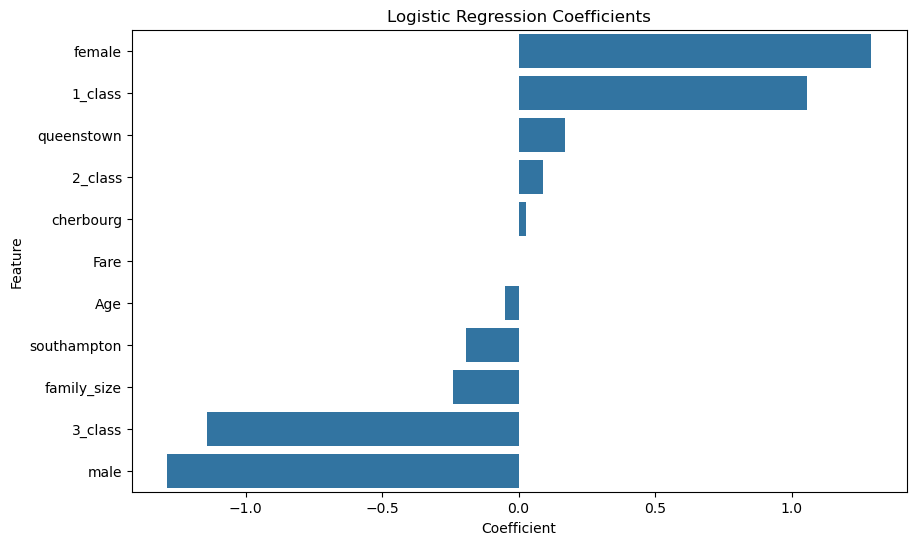

In [139]:
# Extracting the coefficients and their corresponding feature names
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Coefficients')
plt.show()

Part 3


In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Train Naive Bayes on the data
modelNB =GaussianNB()
modelNB.fit(X_train, y_train)


GaussianNB()

In [141]:
# Evaluate the model
y_pred_nb = modelNB.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, modelNB.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred_nb)

# Display evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"ROC: {roc_auc_nb:.2f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.83
Precision: 0.79
Recall: 0.75
ROC: 0.89
Confusion Matrix:
[[96 14]
 [17 52]]


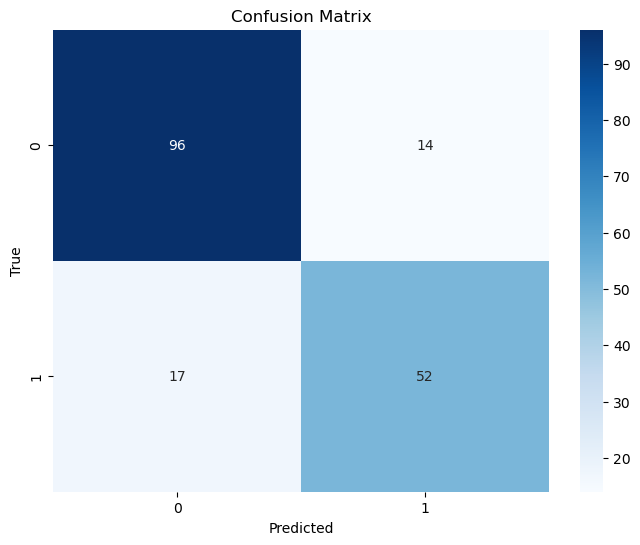

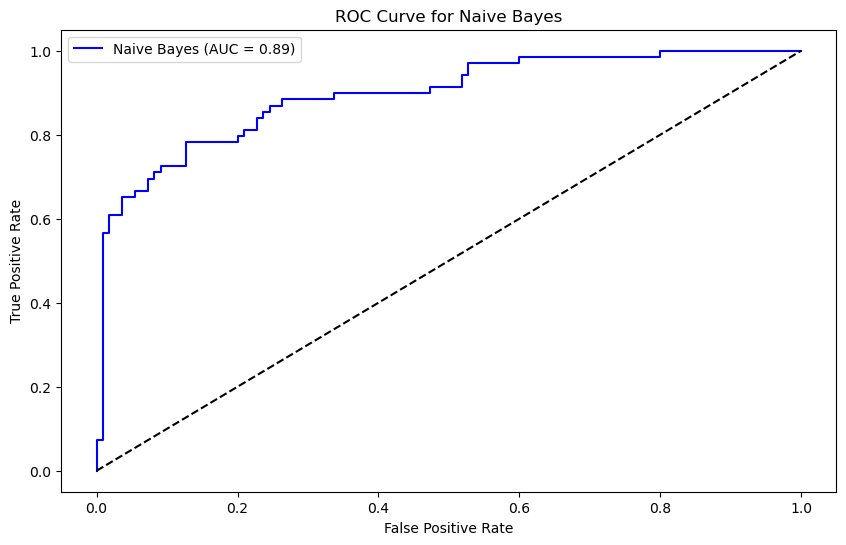

In [142]:
#visualization

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, modelNB.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()



In [143]:
print("Comparison between Logistic Regression and Naïve Bayes:")
print(f"Accuracy: {accuracy} vs {accuracy_nb}")
print(f"Precision: {precision} vs {precision_nb}")
print(f"Recall: {recall} vs {recall_nb}")
print(f"ROC AUC Score: {roc_auc} vs {roc_auc_nb}")

Comparison between Logistic Regression and Naïve Bayes:
Accuracy: 0.8324022346368715 vs 0.8268156424581006
Precision: 0.819672131147541 vs 0.7878787878787878
Recall: 0.7246376811594203 vs 0.7536231884057971
ROC AUC Score: 0.8944664031620554 vs 0.894729907773386
